In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import scipy.stats

In [17]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### For all visualizations, please include a title in each graph and appropriate labels

* Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable


### Median value of owner-occupied homes:

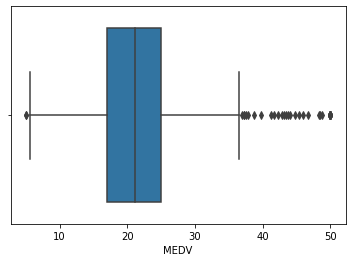

In [4]:
ax = sns.boxplot(x='MEDV', data = boston_df)

### Charles river:

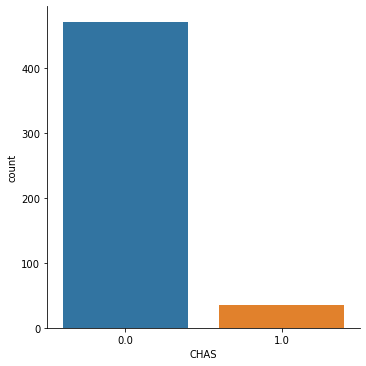

In [5]:
ax = sns.catplot(x='CHAS', kind='count', data = boston_df)

### MEDV variable vs the AGE variable:

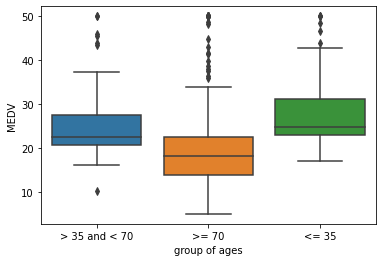

In [15]:
boston_df.loc[(boston_df['AGE'] <= 35), 'group of ages'] = '<= 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'group of ages'] = '> 35 and < 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'group of ages'] = '>= 70'
ax = sns.boxplot(x="group of ages", y="MEDV", data=boston_df)

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:

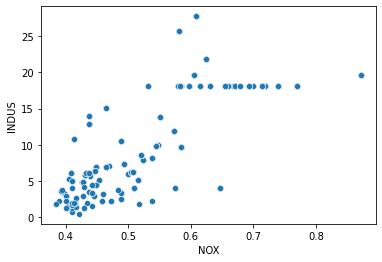

In [7]:
ax = sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)

### Pupil-teacher ratio by town:

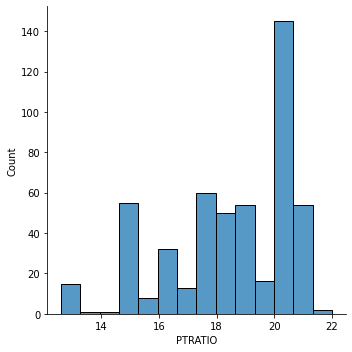

In [8]:
ax = sns.displot(boston_df['PTRATIO'])

## Is there a significant difference in median value of houses bounded by the Charles river or not?

#### Hypothesis:

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")

We first check the equality of variance through the test below:

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

The p-value is less than 0.05 so we can not assume equality of variance in the t-test.

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### We can conclude that since the p-value is less than 0.05, we reject the null hypothesis. There is a statistical difference in median value of houses bounded by the Charles river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#### Hypothesis:

-   $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
-   $H_1:$ At least one of the means differ

In [11]:
scipy.stats.levene(boston_df[boston_df['group of ages'] == '<= 35']['MEDV'], boston_df[boston_df['group of ages'] == '> 35 and < 70']['MEDV'], 
                   boston_df[boston_df['group of ages'] == '>= 70']['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

 Since the p-value is more than 0.05, the variance are equal.

In [12]:
group1 = boston_df[boston_df['group of ages'] == '<= 35']['MEDV']
group2 = boston_df[boston_df['group of ages'] == '> 35 and < 70']['MEDV']
group3 = boston_df[boston_df['group of ages'] == '>= 70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant evidence that at least one of the means differ.**


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
#### Hypothesis:
* $H_0:$ both does not correlate
* $H_1:$ both correlate

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Since the p-value < 0.05, we reject the Null hypothesis. There exists a relationship between NOX and INDUS.**

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

#### Hypothesis:
* $H_0:$ Dis is not correlated with MEDV
* $H_1:$ Dis is correlated with MEDV

In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        16:58:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Since the p-value < 0.05, we reject the Null hypothesis. There exists a relationship between DIS and MEDV.**